# Tasca M5 T02

Esta tarea la dividiremos en tres ejercicios. 

1. Importaremos el dataset housing data y lo describiremos 

2. Utilizando el método train_test_split dividiremos el dataset en conjuntos train y test. Describiremos cada uno de los conjuntos resultantes. 

3. Realizaremos diferentes transformaciones y en cada una de ellas describiremos gráficamente las columnas resultantes: 
- log normalization
- standardscaler
- robustscaler
- transformaciones polinómicas 
- crear columnas dummys para las variables categóricas

## Importación y descripción del dataset

In [1]:
# importamos las librerías necesarias para este ejercicio
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#creamos un objeto con los nombres de las columnas
col_names = (["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])    

#importamos el data set con la función pd.read_csv
df =  pd.read_csv("housing data.csv", sep=",", names=col_names, engine="python")

In [3]:
#echamos un primer vistazo al dataset con el método head
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- Podemos observar un dataset compuesto exclusivamente por columnas númericas (dos de ellas int). 
- A primera vista notamos que las escalas de cada una de las columnas son diferentes.
- La columna "Chas" es binaria (0 y 1) y  la columna "RAD" está organizada por clases. 
- Por los datos añadidos en el archivo .txt podemos afirmar que la variable dependiente está contenida en la columna "MEDV" (Median value of owner-occupied homes in $1000's). 

Es decir que a través de las variables dependientes contenidas en el dataset intentaremos predecir el valor medio de las casas ocupadas por sus propietarios en miles de dólares. 

In [4]:
#confirmamos los types de las columnas mediante el método info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#revisamos las dimensiones del dataset
df.shape

(506, 14)

In [6]:
#realizamos una descripción estadística básica del data set con el metodo describe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Con la descripción estadística podemos concluir de manera preliminar que las medias, las desviaciones estandar, y los máximos y mínimos de cada feature son diferentes y que si queremos realizar cualquier tipo de operación de machine learning deberíamos buscar la mejor manera de estandarizar los datos. 

In [7]:
#finalmente, comprobamos que el dataset no tiene nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## División de datos y descripción de los conjuntos resultantes

Con el objetivo de evaluar el rendimiento de los modelos de machine learning que queramos utilizar para predecir o clasificar la variable dependiente es importante dividir los datos en conjuntos de entrenamiento y de prueba. 

Según la documentación un buen criterio para la división de nuestros datos es el siguiente: 

- 80% train, 20% test de manera general
- 90% train, 10% test si tenemos un dataset pequeño
- 70% train, 30% test si trabajamos con un dataset muy grande. 

Es importante también subrayar que cuando dividamos nuestros datos construiremos cuatro nuevos conjuntos: 
- X_train: conjunto de entrenamiento que contiene todas las variables independientes (se nombra con la X mayúscula para no confundirse con la x de una sola variable independiente)
- y_train: conjunto de entrenamiento que contiene la variable dependiente -la variable a predecir- 
- X_test: conjunto de prueba que contiene todas las variables independientes según el porcentaje que hayamos indicado en los parámetros
- y_test: conjunto de prueba de la variable dependiente

Finalmente, el método train_test selecciona los datos de manera aleatoria. Si queremos controlar esta aletoriedad debemos sembrar una semilla utilizando el parámetro random_state

In [8]:
#separamos del dataset original las variables dependientes y las independientes
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]

In [9]:
#importamos el método train_test_split de la librería sklearn
from sklearn.model_selection import train_test_split 

#corremos el método train_test_split utilizando el 20% del dataset como test y asignando una semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#comenzemos revisando las dimensiones de los conjuntos resultantes
def describe_dimensions(X_train, y_train, X_test, y_test):
    print("Dimensiones de los conjuntos de datos:")
    print(f"X_train: {X_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}")
    print(f"y_test: {y_test.shape}")

describe_dimensions(X_train, y_train, X_test, y_test)

Dimensiones de los conjuntos de datos:
X_train: (404, 13)
y_train: (404,)
X_test: (102, 13)
y_test: (102,)


Efectivamente, los conjuntos train tienen 404 observaciones (el 80% del dataset total que tenía 506), mientras que los conjuntos test tienen el 20% del total. En cuanto a columnas los conjuntos X tienen 13 (el número de variables independientes), y los conjuntos y tienen 1 (la variable dependiente) 

Haremos ahora comparación gráfica de los conjuntos train y test para determinar la distribución de sus variables

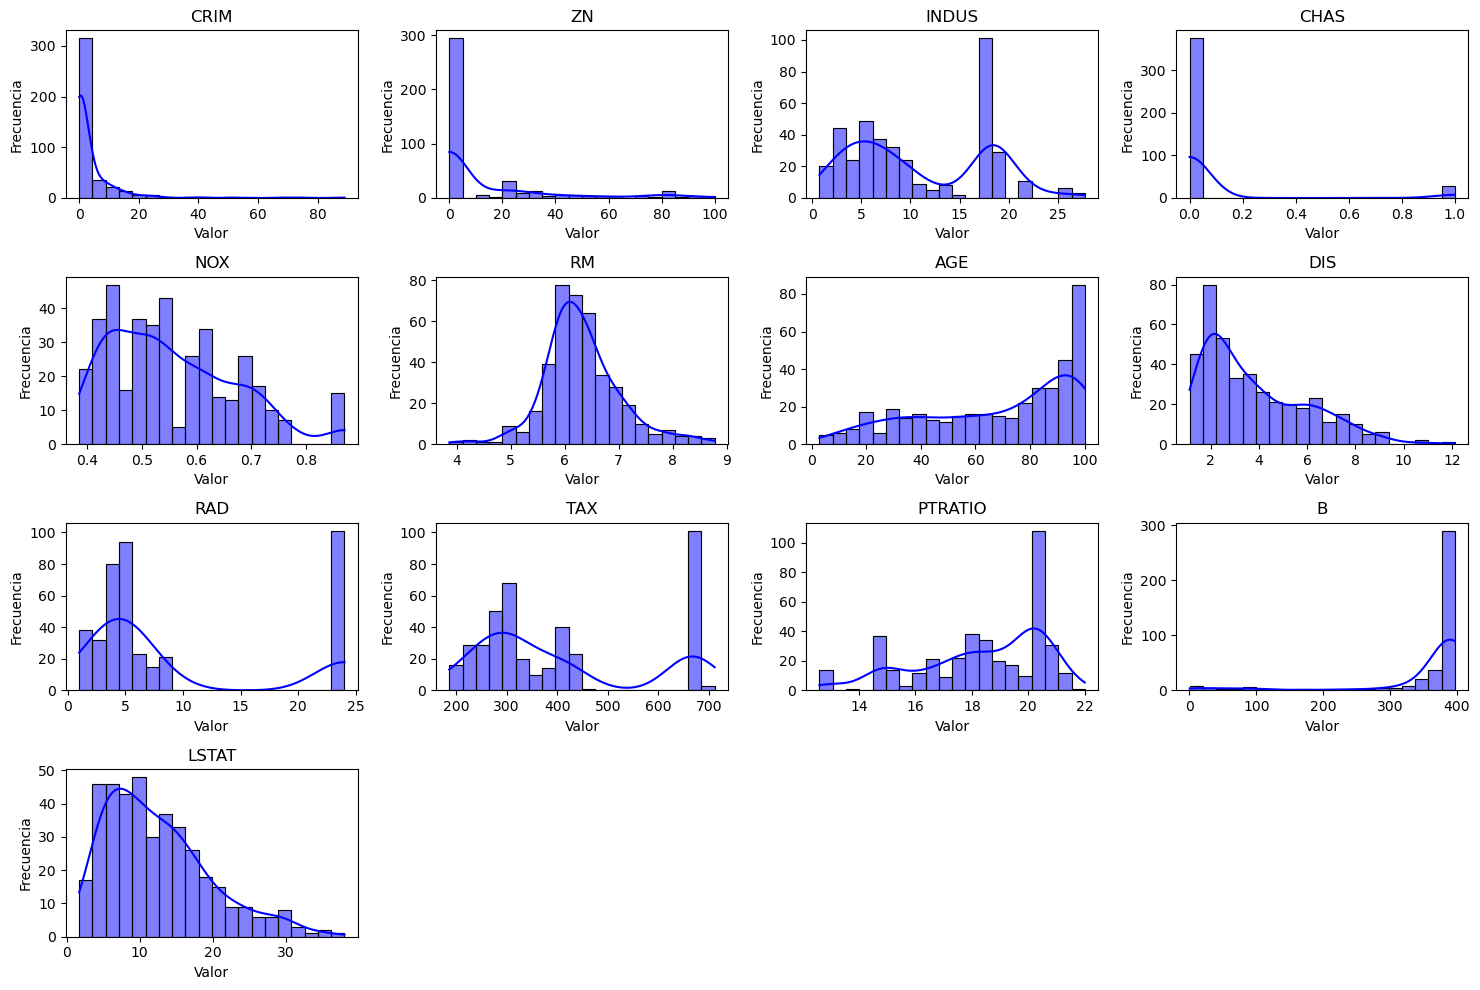

In [11]:
#creamos la figura
plt.figure(figsize=(15, 10))

#iteramos sobre cada columna en X_train y creamos un histograma
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 4, i + 1) 
    sns.histplot(X_train[column], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

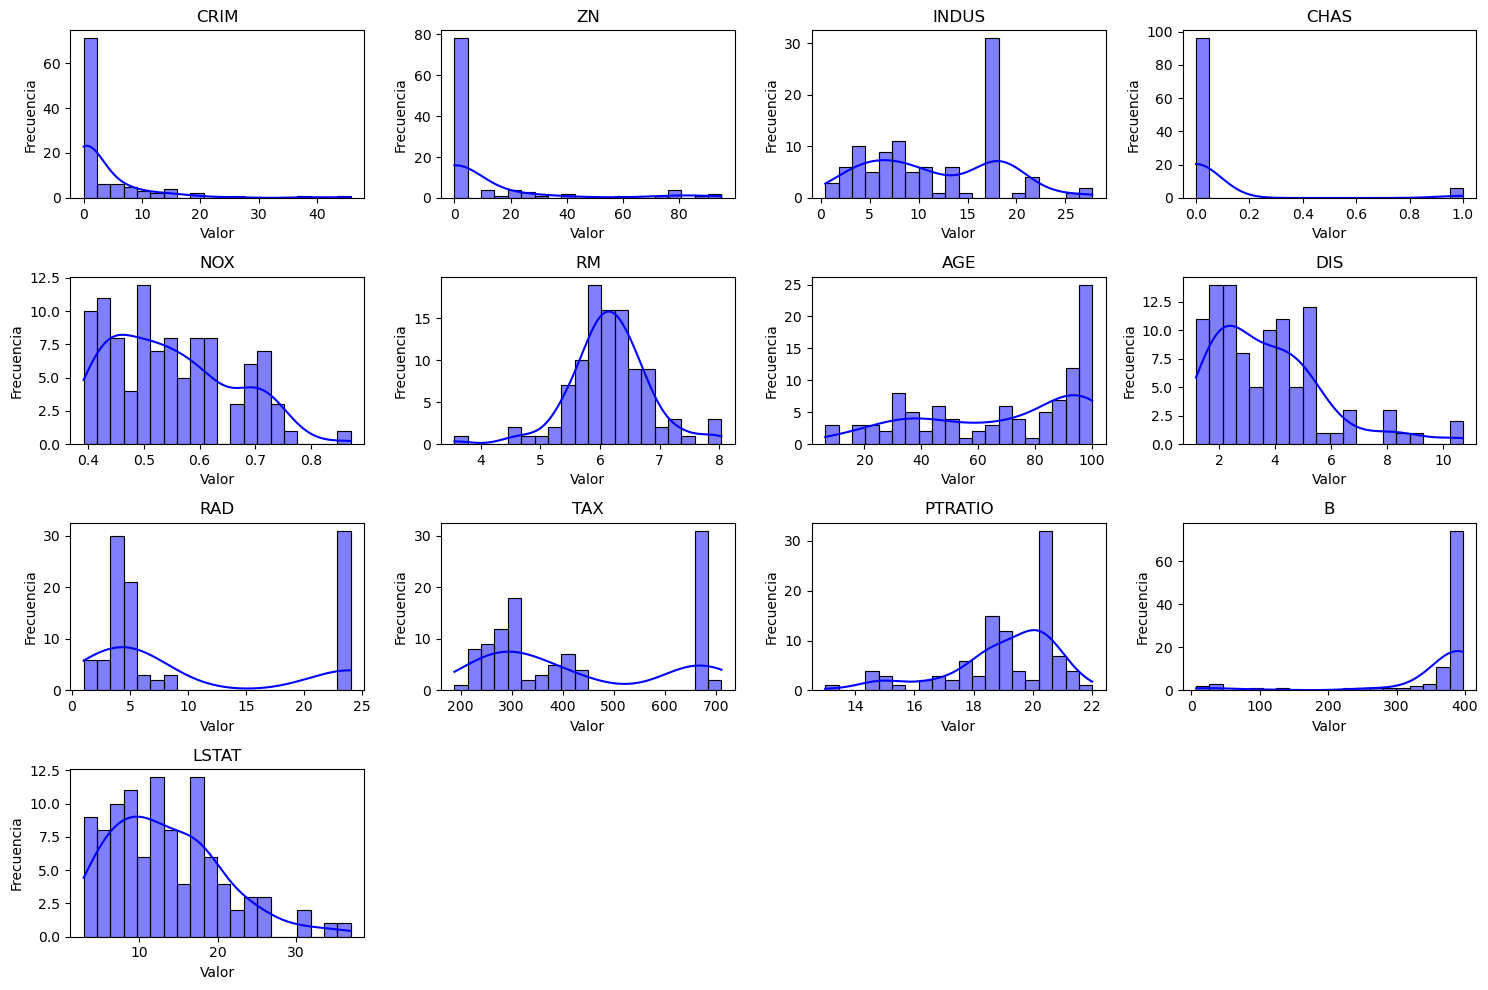

In [12]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(X_train.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(X_test[column], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Como podemos ver en los conjuntos de histogramas la distribución de las variables de X_test como de X_train son similares. 

Sin embargo, también podernos fijarnos que muchas de sus variables no tienen una distribución normal. Por tal razón, tendremos que realizar diferentes tipos de transformaciones ya que varios de los algoritmos de ML necesitan que los datos utilizados tengan una distribución normal para poder entregar resultados correctos. 

Por otra parte, también podemos observar que cada feature está en una escala diferente. Esto es algo que también tendremos que solucionar para poder llevar a cabo procesos de ML exitosos. 

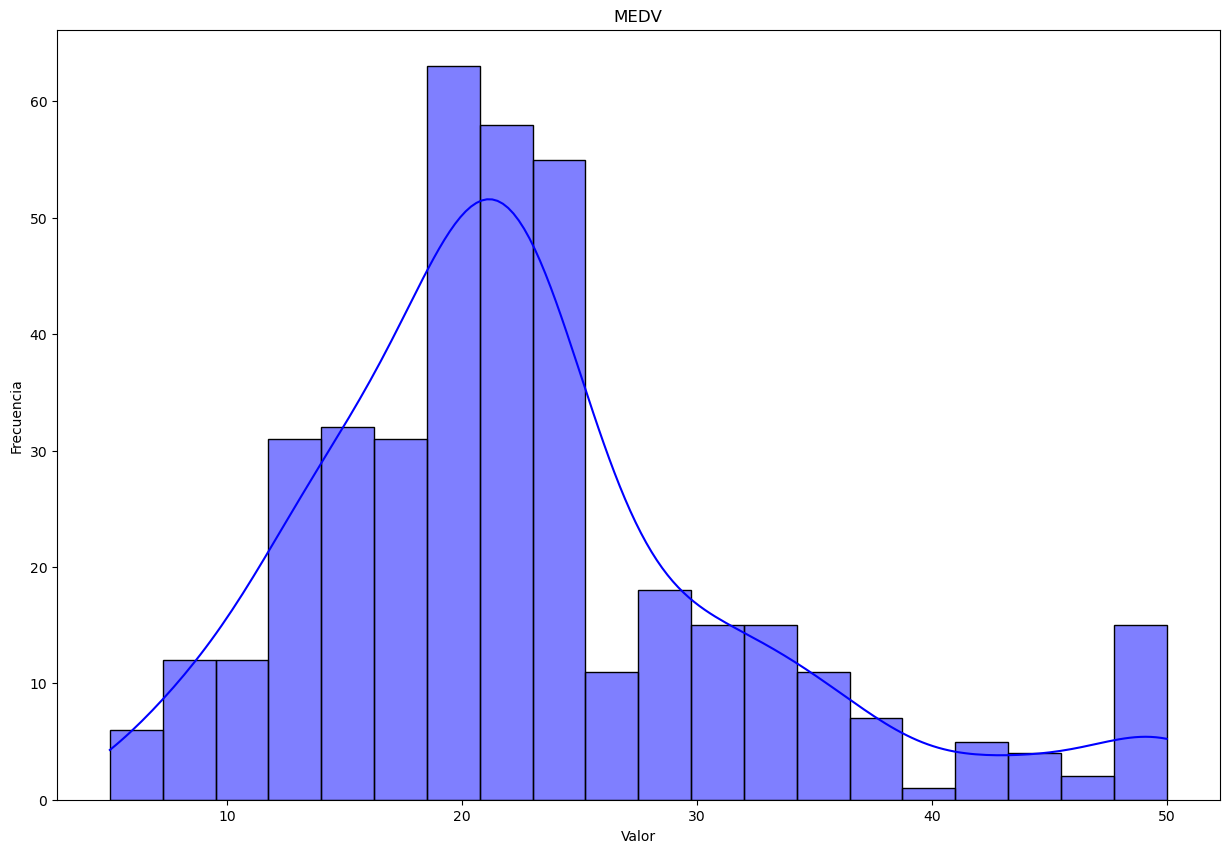

In [13]:
plt.figure(figsize=(15, 10))
sns.histplot(y_train, bins=20, kde=True, color='blue', edgecolor='black')
plt.title("MEDV")
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.show()

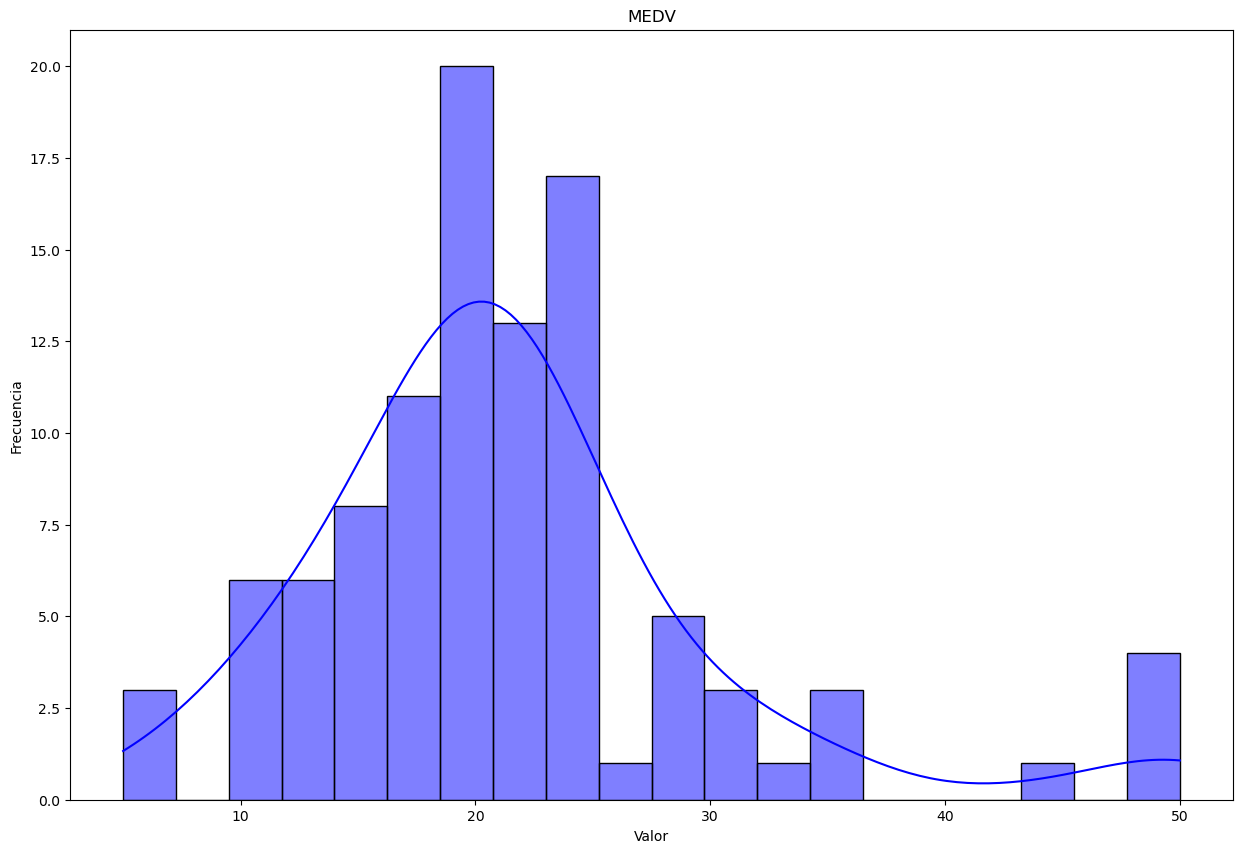

In [14]:
plt.figure(figsize=(15, 10))
sns.histplot(y_test, bins=20, kde=True, color='blue', edgecolor='black')
plt.title("MEDV")
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.show()

En cuanto a la variable dependiente podemos observar que tanto el conjunto de entrenamiento como el de prueba comparten una distribución similar. 

## Transformación de las variables independientes

Como vimos anteriormente las variables independientes necesitan ser transformadas pues presentan distribuciones que no son normales. En este aparte, realizaremos diferentes tipos de transformaciones según el type de cada variable independiente y sus descripción estadística específica. 

### Log normalization

Este tipo de transformación se utiliza para conjuntos de datos con altas varianzas. Convierte los datos a una escala que se aproxima a la normalidad. 

In [15]:
#haremos una copia del df para no modificar el original
df1 = df.copy()

In [16]:
#construimos un objeto X con todas las features continuas (eliminamos las columnas "CHAS" y "RAD" que contienen un binario y una clasificación)
X = df1.drop(["CHAS", "RAD", "MEDV"], axis = 1)
y = df1["MEDV"]

In [17]:
#revisamos el shape de los conjuntos
print(X.shape)
print(y.shape)

(506, 11)
(506,)


In [18]:
#comprobaremos que la varianzas de las features del conjunto X son muy elevadas
print(X.var())

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64


Al comprobar que las varianzas son tan altas podemos justificar la utilización de la transformación logarítmica

In [19]:
#dividimos nuestros datos en train y test utilizando el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Aplicamos la transformación logarítima
X_X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

In [21]:
#veamos las varianzas de los conjuntos X después de la transformació logarítimica
print(X_X_train_log.var())
print(X_test_log.var())

CRIM       1.034264
ZN         2.672353
INDUS      0.446247
NOX        0.005465
RM         0.009268
AGE        0.347280
DIS        0.175722
TAX        0.153569
PTRATIO    0.014826
B          0.549146
LSTAT      0.291492
dtype: float64
CRIM       1.102666
ZN         2.457336
INDUS      0.413875
NOX        0.004778
RM         0.009218
AGE        0.353482
DIS        0.153304
TAX        0.167062
PTRATIO    0.009248
B          0.468977
LSTAT      0.284842
dtype: float64


Podemos observar que las varianzas de los conjuntos de X han disminuido y ahora ninguna es mayor que 3. 

Revisemos las distribuciones de las features de X_X_train_log a ver si modificando las varianzas hemos logrado conseguir que tengan una distribución normal. 

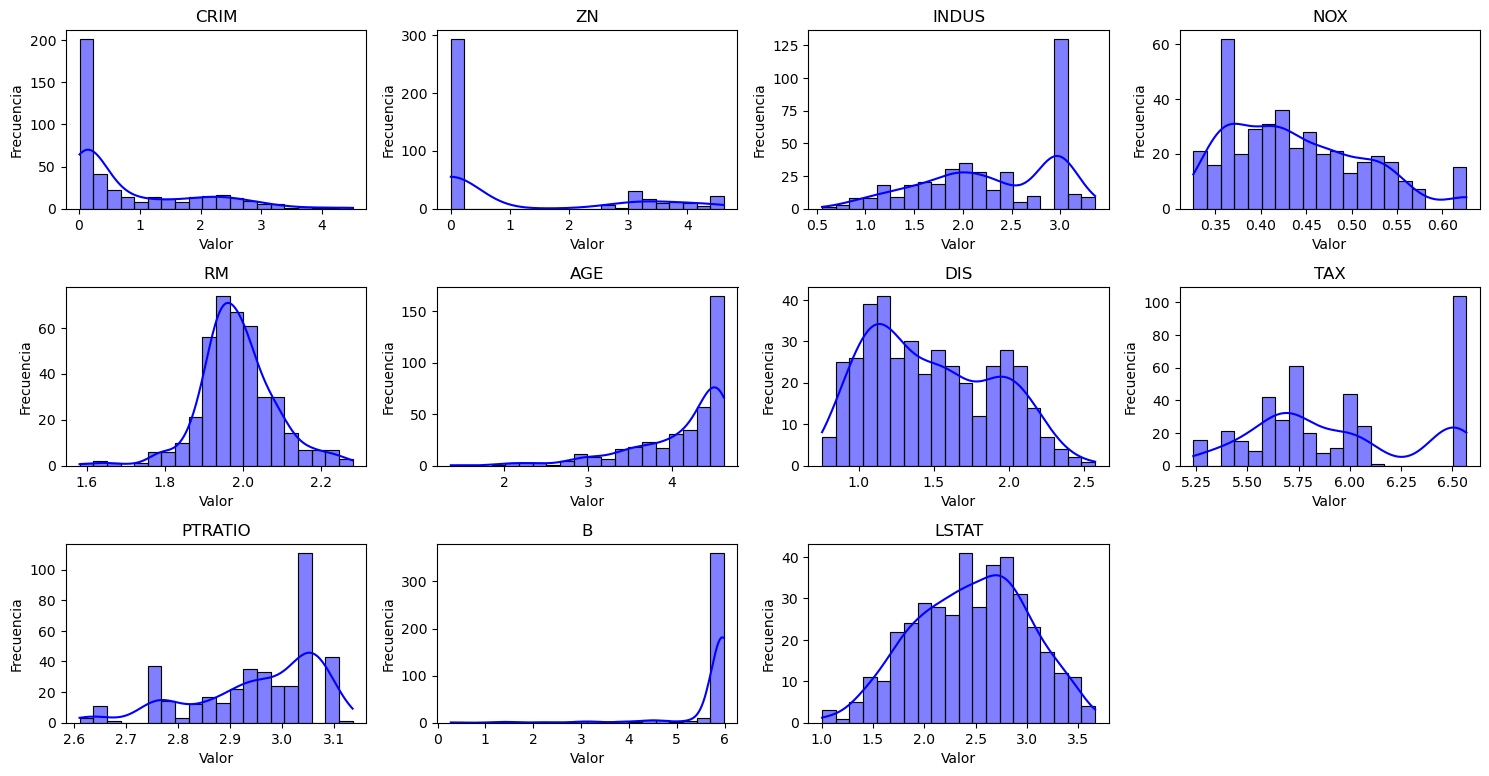

In [23]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(X_X_train_log.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(X_X_train_log[column], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Parece que en este caso la transformación logarítmica no es suficiente para que consigamos que nuestras variables independientes tengan una distribución normal. 

Por esta razón, probaremos otro tipo de transformación: estandarizar los datos

### Estandarización 

In [24]:
#haremos una copia del df para no modificar el original
df2 = df.copy()

In [25]:
#construimos un objeto X con todas las features continuas (eliminamos las columnas "CHAS" y "RAD" que contienen un binario y una clasificación)
X = df2.drop(["CHAS", "RAD", "MEDV"], axis = 1)
y = df2["MEDV"]

In [26]:
#dividimos nuestros datos en train y test utilizando el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#importamos de sklearn el método StandardScaler
from sklearn.preprocessing import StandardScaler

#instanciamos el método
scaler = StandardScaler()

#aplicamos la transformación en los dos subcojuntos de X
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#como el método StandardScaler retorna numpyarrays lo transformaremos en un dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

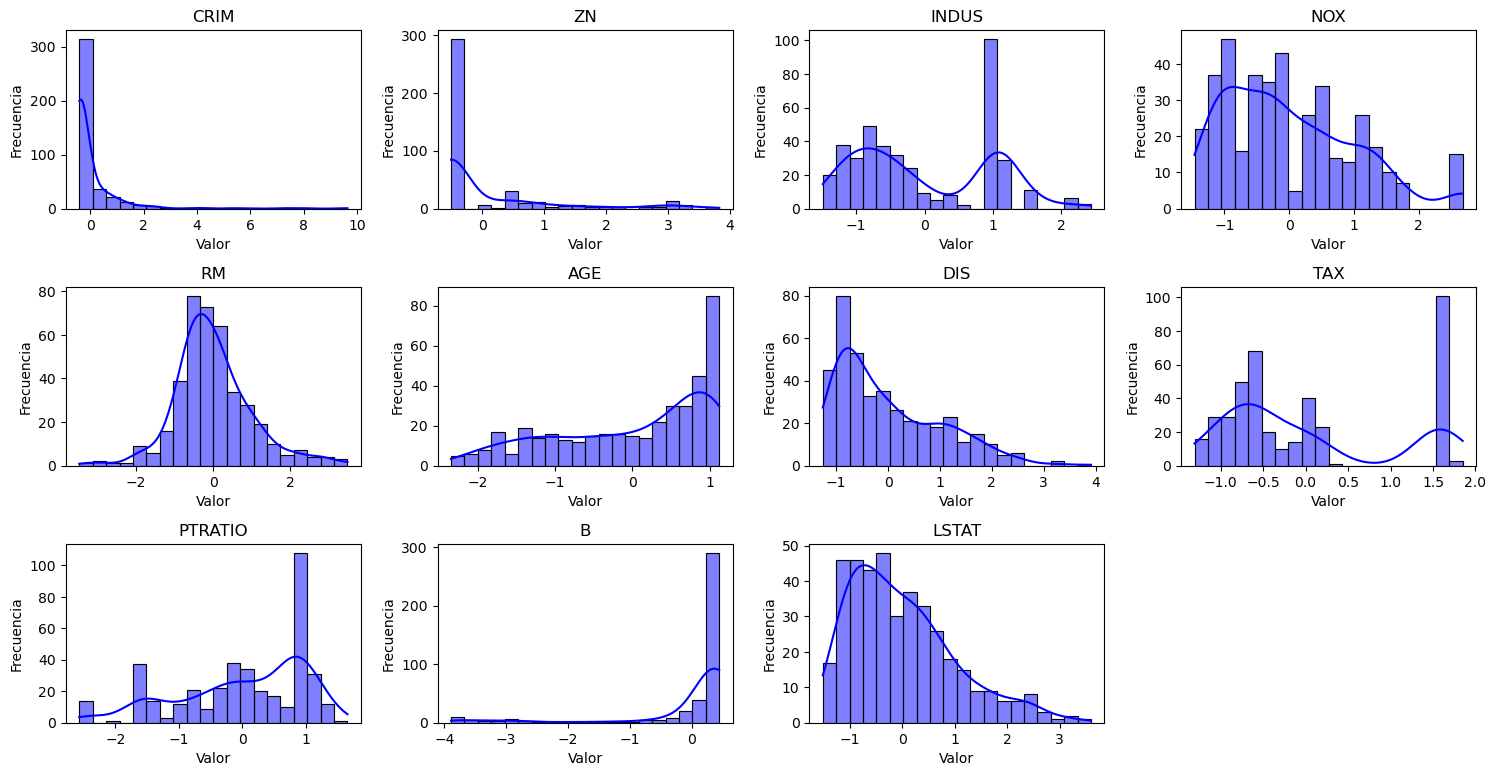

In [28]:
#revisemos si la transformación logró que las features tengan ahora una distribución normal
plt.figure(figsize=(15, 10))

for i, column in enumerate(X_train_scaled_df.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(X_train_scaled_df[column], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [29]:
X_train_scaled_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.638154e-17,0.000000,-4.177077e-17,-5.111423e-16,-2.616169e-16,-4.858600e-16,5.248827e-17,-1.516938e-16,8.519038e-16,-4.946538e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-0.500320,-1.487791e+00,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-0.500320,-8.502733e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-0.500320,-3.521669e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,0.364589,1.033237e+00,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227,2.433163e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


Con el describe podemos comprobar que después de la estandarización las medias de todas las feautures son 0  y la std es de 1, es decir tienen distribuciones normales. Sin embargo, los histogramas nos muestran que en algunos casos el problema con los datos es la presencia de valores atípicos. Por tal razón, realizaremos otra transformación que nos permitirá eliminarlos. 

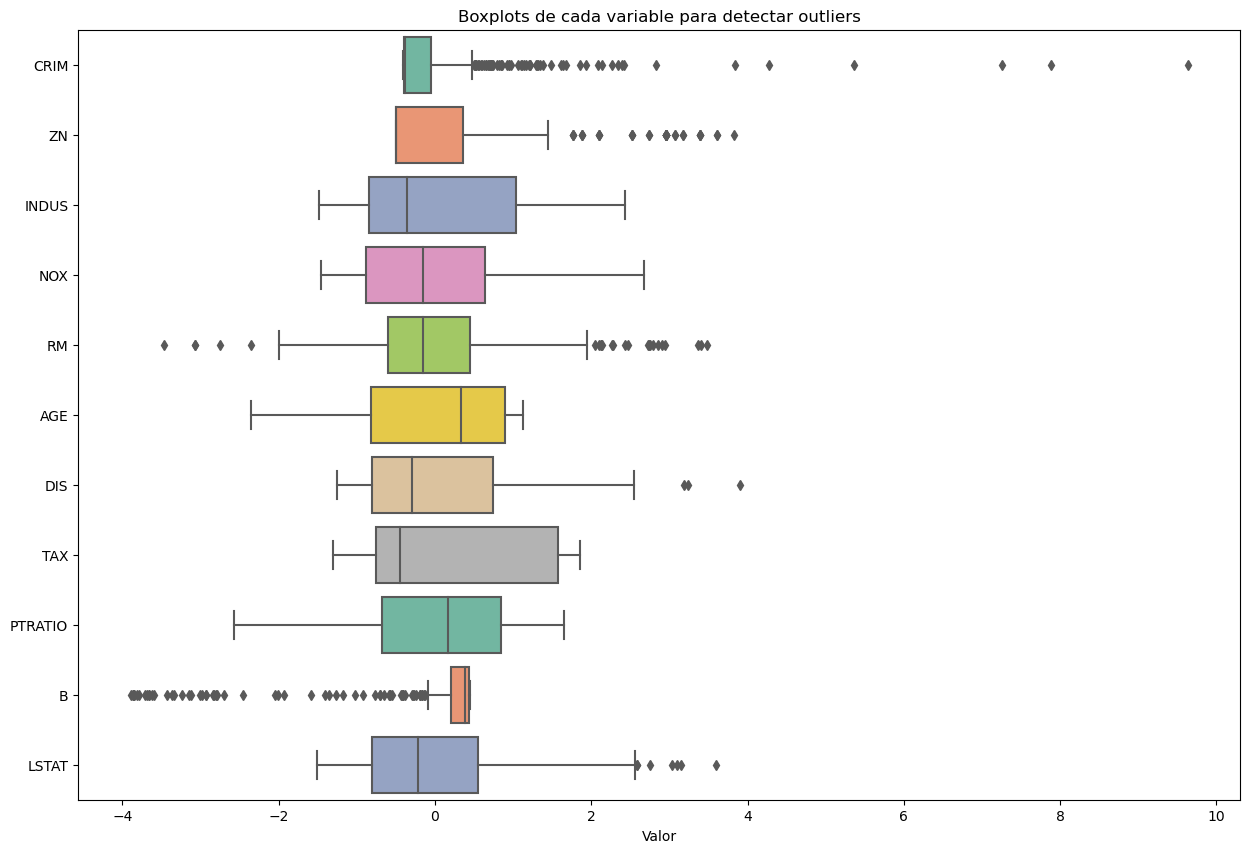

In [30]:
#boxplot de las variable dependientes
#utilizaremos boxplots para revisar si existen outliers
plt.figure(figsize=(15, 10))

sns.boxplot(data=X_train_scaled_df , orient='h', palette='Set2')

plt.title('Boxplots de cada variable para detectar outliers')
plt.xlabel('Valor')
plt.show()

Efectivamente, el boxplot nos demuestra la presencia reiterada de outliers en varias de las features. Por esta razón intentaremos utilizar métodos de transformación que sean más resistentes a los outliers. 

### RobustScaler

A diferencia del método StandardScaler(), RobustScaler no utiliza la media ni la std para la estandarización sino que usa la mediana y el IQR. Por esta razón es más resistente a los outliers. 

In [31]:
#haremos una copia del df para no modificar el original
df3 = df.copy()

In [32]:
#construimos un objeto X con todas las features continuas (eliminamos las columnas "CHAS" y "RAD" que contienen un binario y una clasificación)
X = df3.drop(["CHAS", "RAD", "MEDV"], axis = 1)
y = df3["MEDV"]

In [33]:
#dividimos nuestros datos en train y test utilizando el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#importamos de sklearn el método RobustScaler
from sklearn.preprocessing import RobustScaler

#instanciamos el método
scaler = RobustScaler()

#aplicamos la transformación en los dos subcojuntos de X
X_train_robust= scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

#como el método RobustScaler retorna numpyarrays lo transformaremos en un dataframe
X_train_robust_df = pd.DataFrame(X_train_robust, columns=X_train.columns)

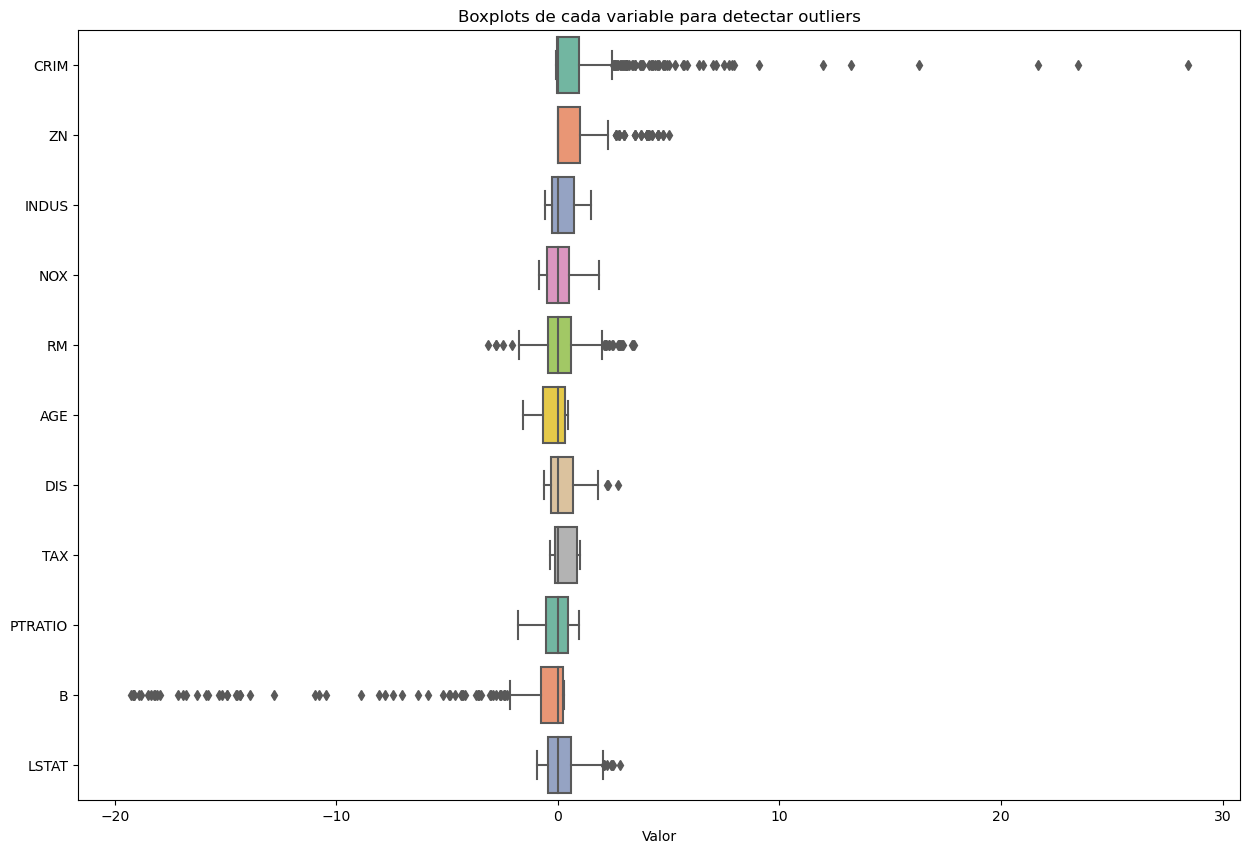

In [35]:
#utilizaremos boxplots para revisar si existen outliers
plt.figure(figsize=(15, 10))

sns.boxplot(data=X_train_robust_df , orient='h', palette='Set2')

plt.title('Boxplots de cada variable para detectar outliers')
plt.xlabel('Valor')
plt.show()

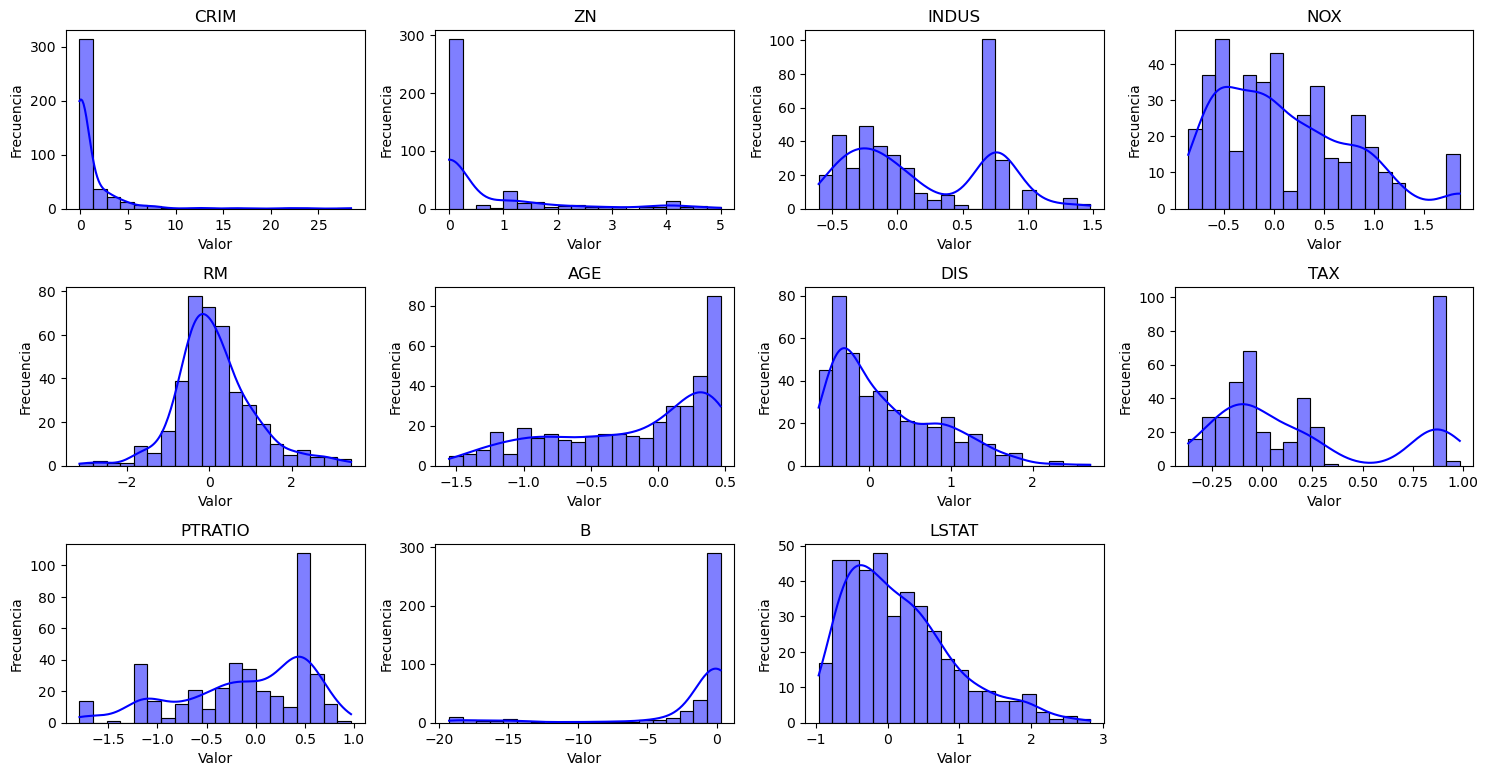

In [36]:
#revisemos si la transformación logró que las features tengan ahora una distribución normal
plt.figure(figsize=(15, 10))

for i, column in enumerate(X_train_robust_df.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(X_train_robust_df[column], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

A pesar de haber utilizado RobustScaler seguimos detectando la presencia de outliers. En este caso, a partir del contexto específico del dataframe, tendríamos que decidir si: 
- eliminar los outliers
- revisar los datos a ver si son correctos
- explorar transformaciones adicionales
- utilizar modelos de ML que puedan manejar outliers de forma efectiva 

### Transformaciones polinómicas 

Este tipo de transformaciones se utilizan cuando hay constancia de que no existen relaciones lineales entre las variables independientes y la dependiente. 

Por tal razón, lo primero que haremos será realizar un scatter para revisar las relaciones de linealidad entre las variables independientes y la dependiente

In [37]:
#hacemos copia del df
df4 = df.copy()

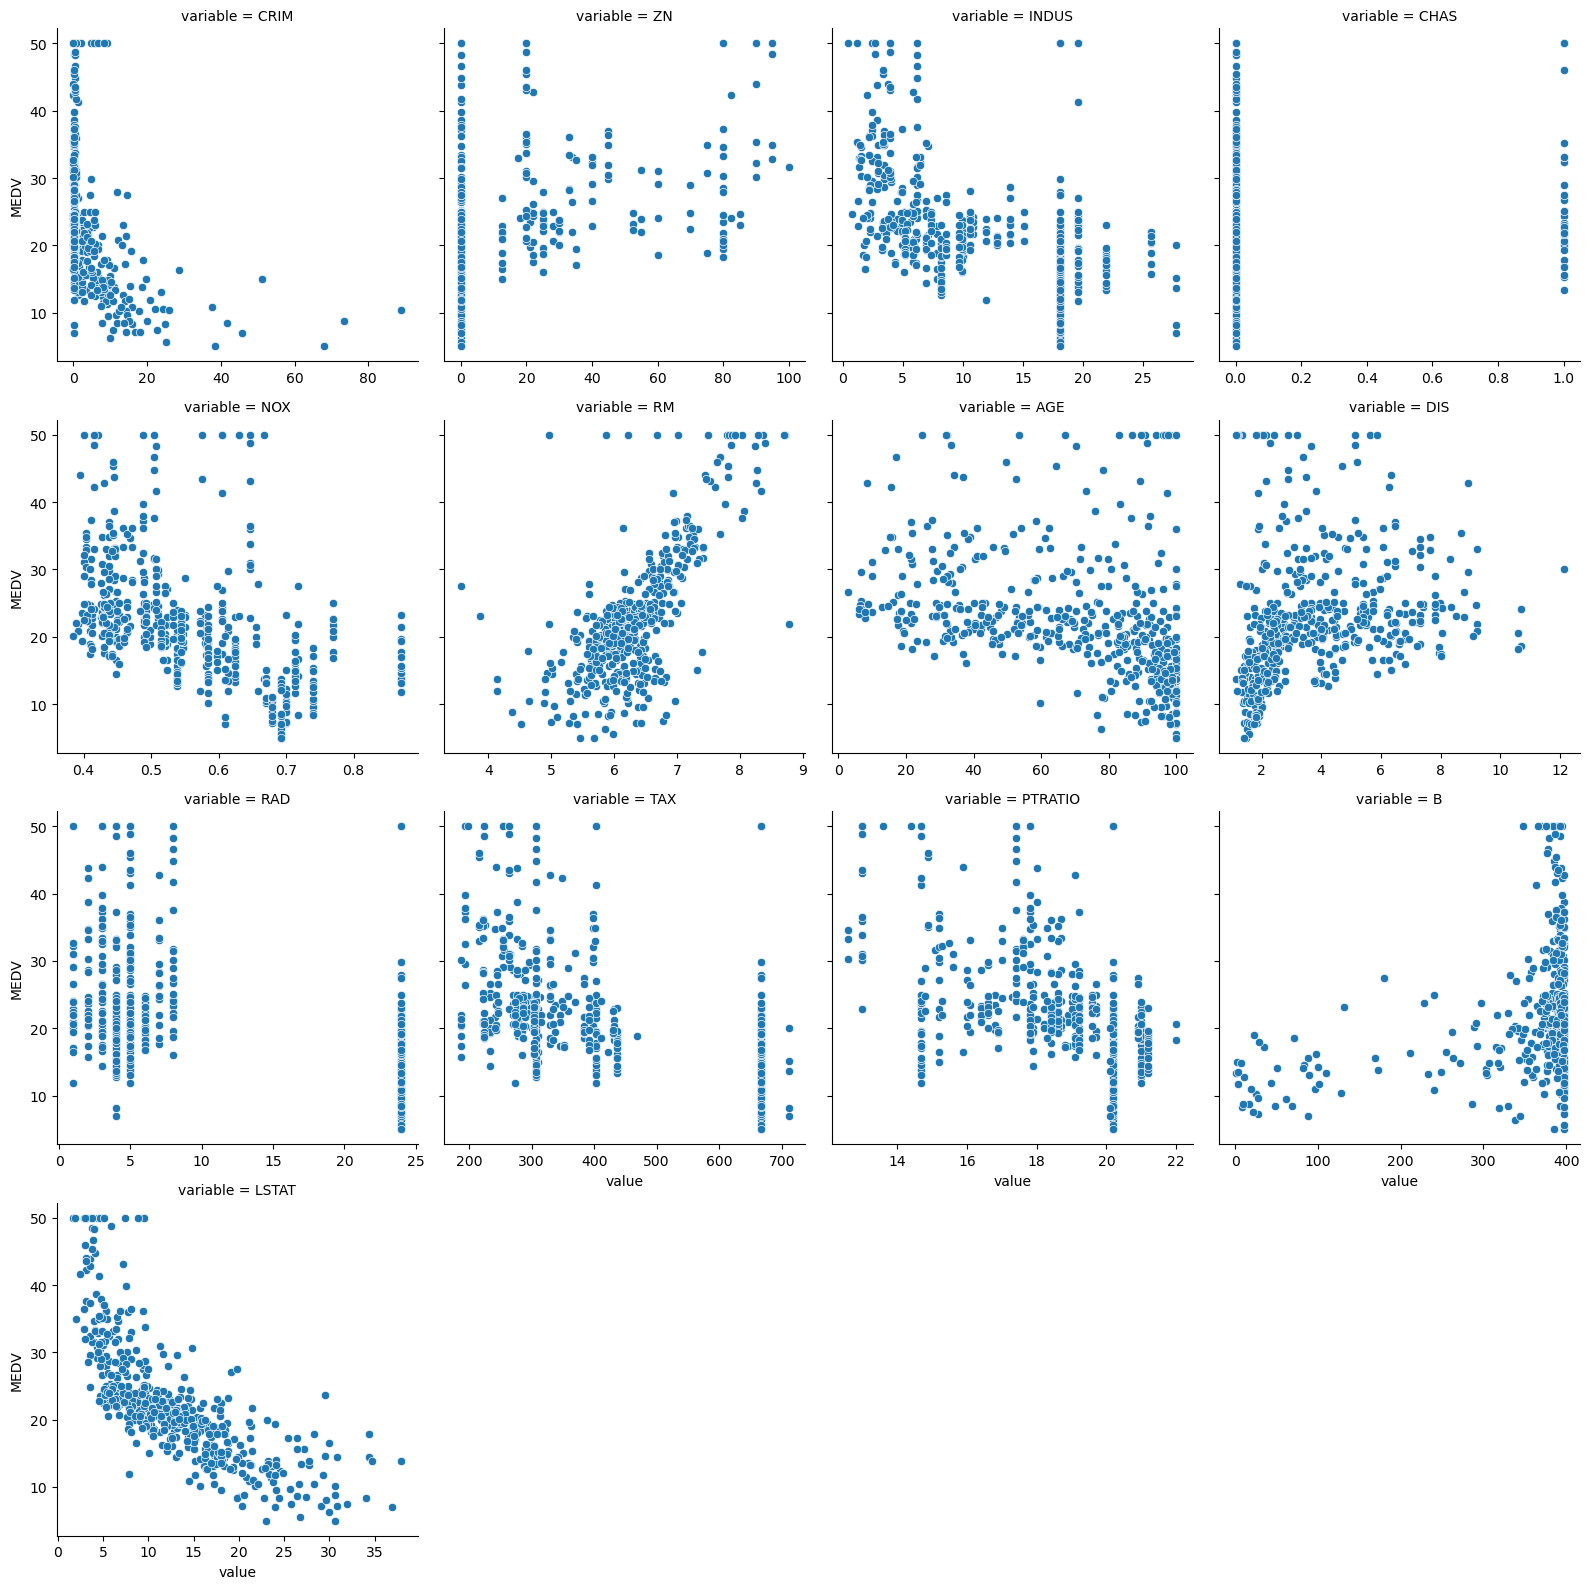

In [38]:
#Hacemos un FacetGrid para observar las relaciones entre las variables independientes y la dependiente

num_cols = 4

g = sns.FacetGrid(df4.melt(id_vars="MEDV"), col="variable", col_wrap=num_cols, height=4, sharex=False)

g.map(sns.scatterplot, "value", "MEDV")

g.fig.tight_layout()

plt.show()

Teniendo en cuenta que la transformación polinómica aporta tanta complejidad al análisis lo mejor será realizarla solo en un conjunto específico de variables. En este caso, utilizaremos las variables "CRIM", "ZN", "INDUS", "NOX" y "TAX". 

Tampoco realizaremos la división de los datos pues lo que más nos interesa aquí es determinar si luego de la transformación polinómica la relación entre el subconjunto de variables independientes y dependientes se modifica

In [39]:
#importamos de skelearn el método PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

#seleccionamos las columnas a transformar
X_subset = df4[["CRIM", "ZN", "INDUS", "NOX", "TAX"]]

poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X_subset)

# Obtener nombres de características manualmente
feature_names = poly.get_feature_names_out(X_subset.columns)

# Convertir el resultado en un DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

In [40]:
X_poly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1           506 non-null    float64
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   NOX         506 non-null    float64
 5   TAX         506 non-null    float64
 6   CRIM^2      506 non-null    float64
 7   CRIM ZN     506 non-null    float64
 8   CRIM INDUS  506 non-null    float64
 9   CRIM NOX    506 non-null    float64
 10  CRIM TAX    506 non-null    float64
 11  ZN^2        506 non-null    float64
 12  ZN INDUS    506 non-null    float64
 13  ZN NOX      506 non-null    float64
 14  ZN TAX      506 non-null    float64
 15  INDUS^2     506 non-null    float64
 16  INDUS NOX   506 non-null    float64
 17  INDUS TAX   506 non-null    float64
 18  NOX^2       506 non-null    float64
 19  NOX TAX     506 non-null    f

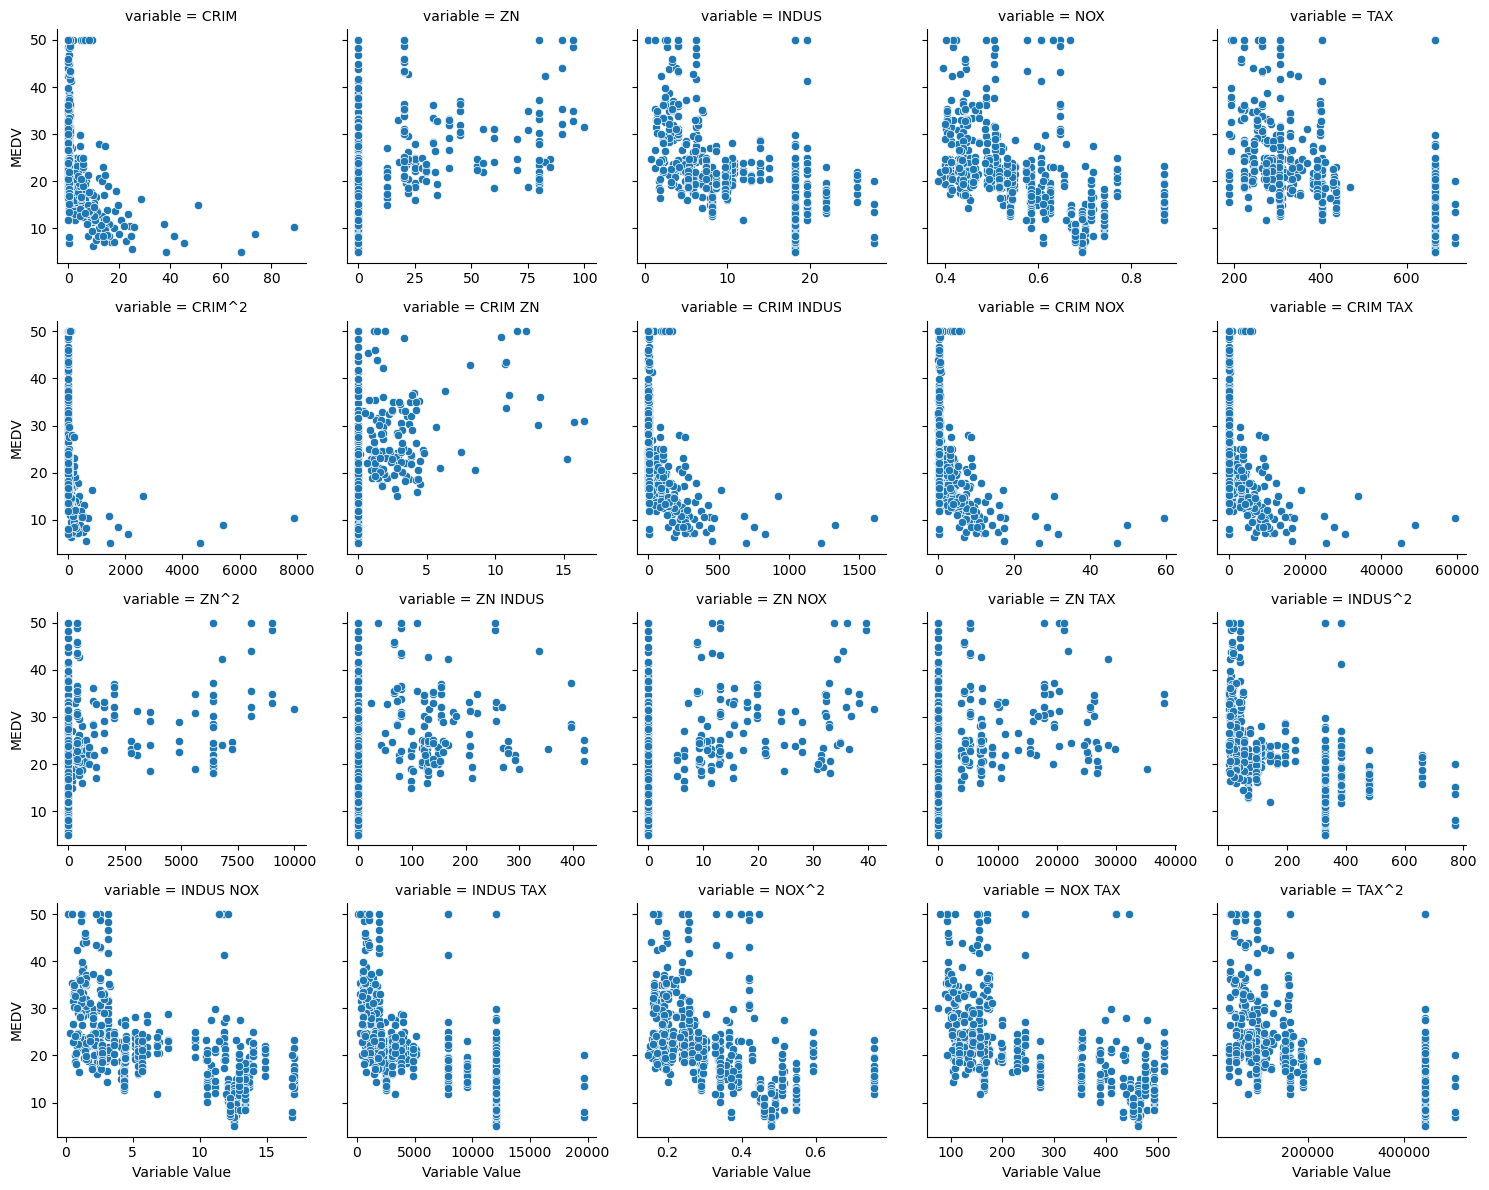

In [41]:
# añadimos la variable dependiente al dataframe transformado
X_poly_df['MEDV'] = df4['MEDV']

# seleccionamos las variables para el scatter plot
selected_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'TAX', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS', 'CRIM NOX', 'CRIM TAX', 'ZN^2', 'ZN INDUS', 'ZN NOX', 'ZN TAX', 'INDUS^2', 'INDUS NOX', 'INDUS TAX', 'NOX^2', 'NOX TAX', 'TAX^2']

# Filtra el DataFrame para seleccionar solo las columnas de interés
selected_df = X_poly_df[selected_features + ['MEDV']]

# Configura la cuadrícula de FacetGrid
grid = sns.FacetGrid(selected_df.melt(id_vars='MEDV'), col='variable', col_wrap=5, height=3, sharex=False)
grid.map(sns.scatterplot, 'value', 'MEDV')

# Ajusta el diseño de los gráficos
grid.set_axis_labels("Variable Value", "MEDV")
plt.show()

El conjunto de las transformaciones polinómicas añadirá complejidad a las variables que no tienen relacionales lineales y hará que los procedimientos de ML tengan más precisión. 

### Transformaciones en variables categóricas (columnas dummy)

Hasta ahora hemos visto transformaciones disponibles para features numéricas. Sin embargo, las variables categóricas también son susceptibles de ser transformadas para mejorar los procedimientos de ML. 

En nuestro data set contamos con dos columnas que representan variables categóricas: 
-CHAS: 1 si la propiedad limita con el río; 0 si la propiedad no limita con el río. 

-RAD: índice de accesibilidad a las autopistas radiales representado en las categorías 1,  2,  3,  4,  5,  6,  7,  8 y 24

Precisamente vamos a utilizar esta última variable para realizar la transformación dummy que lo que hace es descomponer la variable en nuevas columnas binarias para cada categoría única. Cada columna representa la ausencia o presencia de la categoría señalada. 

En este caso la transformación de la columna RAD desplegará 9 columnas que nos indicarán en que categoría de accesibilidad a las autopistas radiales se ubica cada observación. 



In [42]:
#hacemos nueva copia del df
df5 = df.copy()

In [43]:
#contamos los valores de la columna "RAD"
df5["RAD"].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [44]:
# creamos las columnas dummy
df_dummy = pd.get_dummies(df5["RAD"], prefix="RAD")

In [45]:
#eliminamos la columna original
df5 = df5.drop("RAD", axis=1)

In [46]:
#convertimos las columnas dummy a 1 y 0 
df_dummy = df_dummy.astype(int)

In [47]:
#concatenamos los dos datasets
df5 = pd.concat([df5, df_dummy], axis=1)

In [49]:
df5.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


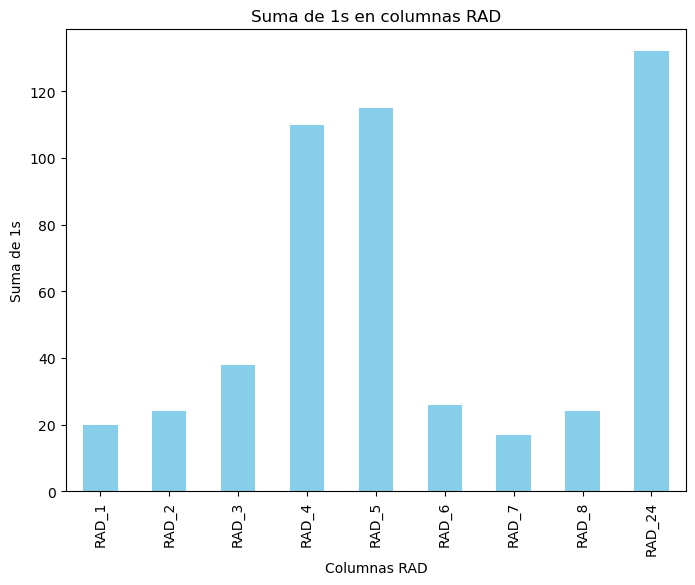

In [55]:
#visualizemos el contenido de las columnas dummy

#seleccionemos las columnas que tengan en su header la palabra "RAD"
columns_rad = df5.filter(regex='RAD')

#creamos la figura
plt.figure(figsize=(8, 6))

#diseñamos el gráfico
columns_rad.sum().plot(kind='bar', color='skyblue')
plt.xlabel('Columnas RAD')
plt.ylabel('Suma de 1s')
plt.title('Suma de 1s en columnas RAD')
plt.show()

Como podemos darnos cuenta ahora tenemos 9 columnas adicionales cada una representando la existencia (1) o no (0) de una de las categorías de RAD en cada una de las observaciones. 